<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

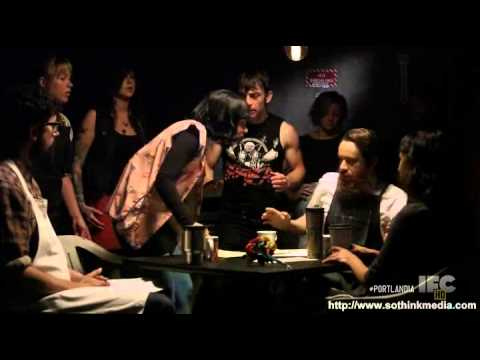

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/anastasialysenko/github_repos/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
shops['full_review_text'][1]

' 12/2/2016 Listed in Date Night: Austin, Ambiance in Austin BEAUTIFUL!!!! Love the ambiance! Instagram-worthy!!!  Definitely $$$, so be prepared. This is gonna cost you a pretty penny :) Waffle dessert was just decent...nothing to rave about.  But, will probably be back just to be somewhere unique and nice. '

In [5]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 5.8 MB/s eta 0:00:014     |████████████████████████▍       | 629.7 MB 6.9 MB/s eta 0:00:29
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [6]:
# Start here 
from collections import Counter
import spacy
from spacy.tokenizer import Tokenizer
import en_core_web_lg
import re
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
shops['review_date'] = shops['full_review_text'].apply(lambda x: re.findall(r'\b[0-3]?[0-9]/[0-3]?[0-9]/(?:[0-9]{2})?[0-9]{2}\b', x))
shops['star_rating'] = shops['star_rating'].apply(lambda x: re.findall(r'[-+]?([0-9]*\.[0-9]+|[0-9]+)', x))

In [8]:
shops['review_date'] = shops['review_date'].apply(lambda x: x[0])
shops['star_rating'] = shops['star_rating'].apply(lambda x: x[0])

In [9]:
nlp = en_core_web_lg.load()
tokenizer = Tokenizer(nlp.vocab)

shops['full_review_text'] = shops['full_review_text'].apply(lambda x: re.sub(r'\b[0-3]?[0-9]/[0-3]?[0-9]/(?:[0-9]{2})?[0-9]{2}\b', '', x))
# shops['full_review_text'] = shops['full_review_text'].apply(lambda x: re.sub('[^a-zA-Z ]+', '', x))
# shops['full_review_text'] = shops['full_review_text'].apply(lambda x: [token.text for token in tokenizer(x.lower())])

In [10]:
# nlp = spacy.load('en_core_web_md')

# tokens = []
# for doc in nlp.pipe(shops['full_review_text'], disable=['parser', 'tagger']):
#     doc_tokens = []
#     for token in doc:
#         doc_tokens.append(token.text)
#     tokens.append(doc_tokens)

# shops['full_review_text'] = tokens

In [11]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! E...,5.0,11/25/2016
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Au...",4.0,12/2/2016
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved th...,4.0,11/30/2016
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating H...,2.0,11/25/2016
4,The Factory - Cafe With a Soul,1 check-in They are located within the North...,4.0,12/3/2016


In [12]:
# nlp = spacy.load('en_core_web_lg')
stop_list = list(nlp.Defaults.stop_words)

tokens = []
for doc in nlp.pipe(shops['full_review_text'], disable=['parser', 'tagger']):
    doc_tokens = []
    for token in doc:
        if ((token.text.strip()).isdigit()) or (token.text.strip() == ''):
            pass
        elif (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
        else:
            pass
    tokens.append(doc_tokens)
#     for token in doc:
#         if (token.text in stop_list) or (token.text.strip() == ''):
#             pass
#         else:
#             doc_tokens.append(token)
#     tokens.append(doc_tokens)

In [13]:
shops['spaCyTokens_01'] = tokens

In [14]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date,spaCyTokens_01
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! E...,5.0,11/25/2016,"[check, love, love, loved, atmosphere, corner,..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Au...",4.0,12/2/2016,"[listed, date, night, austin, ambiance, austin..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved th...,4.0,11/30/2016,"[check, listed, brunch, spots, loved, eclectic..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating H...,2.0,11/25/2016,"[cool, decor, good, drinks, nice, seating, ove..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the North...,4.0,12/3/2016,"[check, located, northcross, mall, shopping, c..."


In [15]:
def count(tokens):
    """
    Calculates some basic statistics about tokens in our corpus (i.e. corpus means collections text data)
    """
    # stores the count of each token
    word_counts = Counter()
    
    # stores the number of docs that each token appears in 
    appears_in = Counter()

    total_docs = len(tokens)

    for token in tokens:
        # stores count of every appearance of a token 
        word_counts.update(token)
        # use set() in order to not count duplicates, thereby count the num of docs that each token appears in
        appears_in.update(set(token))

    # build word count dataframe
    temp = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # rank the the word counts
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # calculate the percent total of each token
    wc['pct_total'] = wc['count'].apply(lambda token_count: token_count / total)

    # calculate the cumulative percent total of word counts 
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    # create dataframe for document stats
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    
    # merge word count stats with doc stats
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

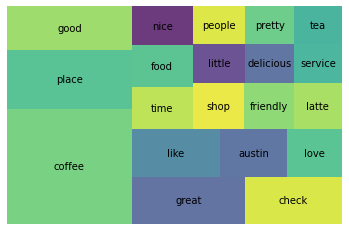

In [16]:
wc = count(shops['spaCyTokens_01'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [17]:
STOP_WORDS = nlp.Defaults.stop_words.union(['coffee', 'austin', 'place', 'shop', 'check', 'got', 'go'])

tokens = []
for doc in nlp.pipe(shops['full_review_text'], disable=['parser', 'tagger']):
    doc_tokens = []
    for token in doc:
        if ((token.text.strip()).isdigit()) or (token.text.strip() == ''):
            pass
        elif (token.text.lower() not in STOP_WORDS) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
        else:
            pass
    tokens.append(doc_tokens)
    
shops['spaCyTokens_02'] = tokens

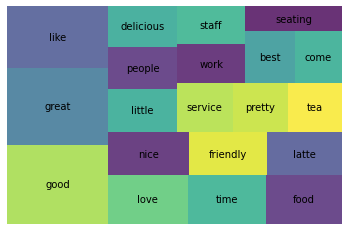

In [18]:
wc = count(shops['spaCyTokens_02'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [19]:
wc.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
144,good,2792,3986,1.0,0.012077,0.012077,0.366597
62,great,2843,3933,2.0,0.011917,0.023994,0.373293
156,like,2142,3125,3.0,0.009468,0.033462,0.281250
35,love,1499,1942,4.0,0.005884,0.039346,0.196822
497,time,1487,1905,5.0,0.005772,0.045118,0.195247
384,food,1389,1868,6.0,0.005660,0.050778,0.182379
39,nice,1470,1751,7.0,0.005305,0.056083,0.193015
172,friendly,1611,1704,8.0,0.005163,0.061246,0.211528
36,latte,1135,1632,9.0,0.004945,0.066191,0.149028
620,little,1243,1506,10.0,0.004563,0.070754,0.163209


In [20]:
wc.tail(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
17832,offsetting,1,1,17836.0,0.000003,0.999973,0.000131
17838,romaine,1,1,17837.0,0.000003,0.999976,0.000131
17837,rib,1,1,17838.0,0.000003,0.999979,0.000131
17835,predictably,1,1,17839.0,0.000003,0.999982,0.000131
17836,blts,1,1,17840.0,0.000003,0.999985,0.000131
17840,roomier,1,1,17841.0,0.000003,0.999988,0.000131
17839,windowed,1,1,17842.0,0.000003,0.999991,0.000131
17842,actuality,1,1,17843.0,0.000003,0.999994,0.000131
17841,crass,1,1,17844.0,0.000003,0.999997,0.000131
17844,digestion,1,1,17845.0,0.000003,1.000000,0.000131


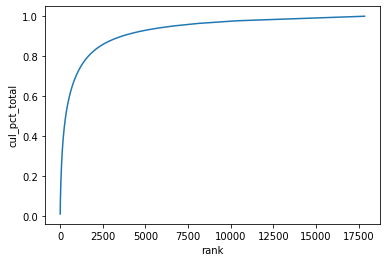

In [21]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

(17845, 7)


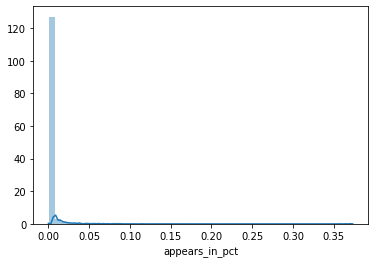

In [22]:
print(wc.shape)
sns.distplot(wc['appears_in_pct']);

(3955, 7)


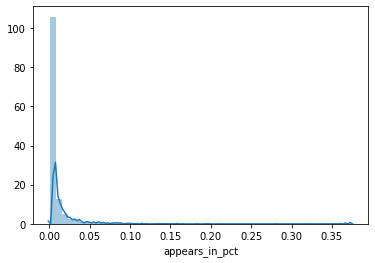

In [23]:
wc_reduced = wc[wc['appears_in_pct'] >= 0.001]

print(wc_reduced.shape)
sns.distplot(wc_reduced['appears_in_pct']);

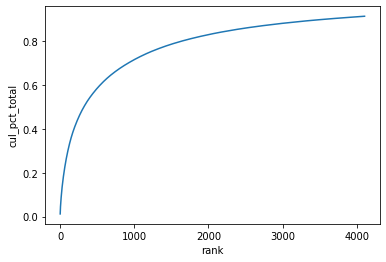

In [24]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc_reduced);

In [25]:
tokens = []
for doc in nlp.pipe(shops['full_review_text'], disable=['parser', 'tagger']):
    doc_tokens = []
    for token in doc:
        if ((token.text.strip()).isdigit()) or (token.text.strip() == ''):
            pass
        elif (token.text.lower() not in STOP_WORDS) & (token.is_punct == False) & (token.pos_ != 'PRON'):
            doc_tokens.append(token.lemma_.lower())
        else:
            pass
    tokens.append(doc_tokens)
    
shops['spaCyLemmas_01'] = tokens

In [26]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date,spaCyTokens_01,spaCyTokens_02,spaCyLemmas_01
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! E...,5.0,11/25/2016,"[check, love, love, loved, atmosphere, corner,...","[love, love, loved, atmosphere, corner, style,...","[love, love, love, atmosphere, corner, style, ..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Au...",4.0,12/2/2016,"[listed, date, night, austin, ambiance, austin...","[listed, date, night, ambiance, beautiful, lov...","[listed, date, night, ambiance, beautiful, lov..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved th...,4.0,11/30/2016,"[check, listed, brunch, spots, loved, eclectic...","[listed, brunch, spots, loved, eclectic, homey...","[listed, brunch, spots, love, eclectic, homey,..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating H...,2.0,11/25/2016,"[cool, decor, good, drinks, nice, seating, ove...","[cool, decor, good, drinks, nice, seating, ove...","[cool, decor, good, drink, nice, seat, overpri..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the North...,4.0,12/3/2016,"[check, located, northcross, mall, shopping, c...","[located, northcross, mall, shopping, center, ...","[locate, northcross, mall, shop, center, face,..."


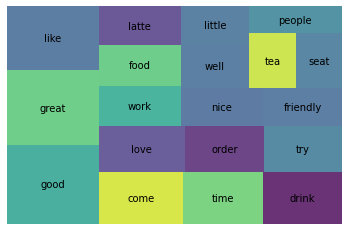

In [27]:
wc = count(shops['spaCyLemmas_01'])
wc_top20 = wc[wc['rank'] < 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

In [28]:
lemmas = []
for doc in shops['spaCyLemmas_01']:
    doc_lemmas = []
    for lemma in doc:
        if lemma == 'great':
            doc_lemmas.append('good')
        elif lemma == 'love':
            doc_lemmas.append('like')
        else:
            doc_lemmas.append(lemma)
    lemmas.append(doc_lemmas)
    
shops['spaCyLemmas_02'] = lemmas

In [29]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date,spaCyTokens_01,spaCyTokens_02,spaCyLemmas_01,spaCyLemmas_02
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! E...,5.0,11/25/2016,"[check, love, love, loved, atmosphere, corner,...","[love, love, loved, atmosphere, corner, style,...","[love, love, love, atmosphere, corner, style, ...","[like, like, like, atmosphere, corner, style, ..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Au...",4.0,12/2/2016,"[listed, date, night, austin, ambiance, austin...","[listed, date, night, ambiance, beautiful, lov...","[listed, date, night, ambiance, beautiful, lov...","[listed, date, night, ambiance, beautiful, lik..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved th...,4.0,11/30/2016,"[check, listed, brunch, spots, loved, eclectic...","[listed, brunch, spots, loved, eclectic, homey...","[listed, brunch, spots, love, eclectic, homey,...","[listed, brunch, spots, like, eclectic, homey,..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating H...,2.0,11/25/2016,"[cool, decor, good, drinks, nice, seating, ove...","[cool, decor, good, drinks, nice, seating, ove...","[cool, decor, good, drink, nice, seat, overpri...","[cool, decor, good, drink, nice, seat, overpri..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the North...,4.0,12/3/2016,"[check, located, northcross, mall, shopping, c...","[located, northcross, mall, shopping, center, ...","[locate, northcross, mall, shop, center, face,...","[locate, northcross, mall, shop, center, face,..."


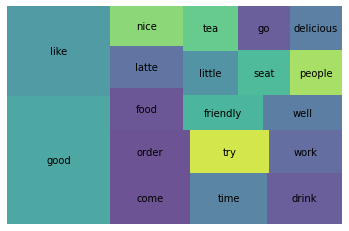

In [30]:
wc = count(shops['spaCyLemmas_02'])
wc_top20 = wc[wc['rank'] < 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [31]:
shops['star_rating'].value_counts()

5.0    3780
4.0    2360
3.0     738
2.0     460
1.0     278
Name: star_rating, dtype: int64

In [32]:
shops['star_rating'].dtypes

dtype('O')

In [33]:
shops['star_rating'] = [float(star) for star in shops['star_rating']]

In [34]:
shops['good'] = shops['star_rating'] >= 4.0
shops['bad'] = shops['star_rating'] < 4.0

In [35]:
def make_comp_plots(data, lemma_column, reduce, rank=20):
    wc_good = count(data[data['good'] == True][lemma_column])
    wc_bad = count(data[data['bad'] == True][lemma_column])
    
    if reduce:
        wc_good = wc_good[wc_good['appears_in_pct'] > 0.01]
        wc_bad = wc_bad[wc_bad['appears_in_pct'] > 0.01]
        wc_good20 = wc_good[(wc_good['rank'] > rank) & (wc_good['rank'] <= rank + 20)]
        wc_bad20 = wc_bad[(wc_bad['rank'] > rank) & (wc_bad['rank'] <= rank + 20)]
     
    else:
        wc_good20 = wc_good[wc_good['rank'] <= rank]
        wc_bad20 = wc_bad[wc_bad['rank'] <= rank]

    fig, axes = plt.subplots(1, 3, figsize=(20, 8))

    axes[0].set_title('All cafe reviews')
    squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8, ax=axes[0])
    axes[0].axis('off')

    axes[1].set_title('Good cafe reviews')
    squarify.plot(sizes=wc_good20['pct_total'], label=wc_good20['word'], alpha=.8, ax=axes[1])
    axes[1].axis('off')

    axes[2].set_title('Bad cafe reviews')
    squarify.plot(sizes=wc_bad20['pct_total'], label=wc_bad20['word'], alpha=.8, ax=axes[2])
    axes[2].axis('off')
    plt.show()

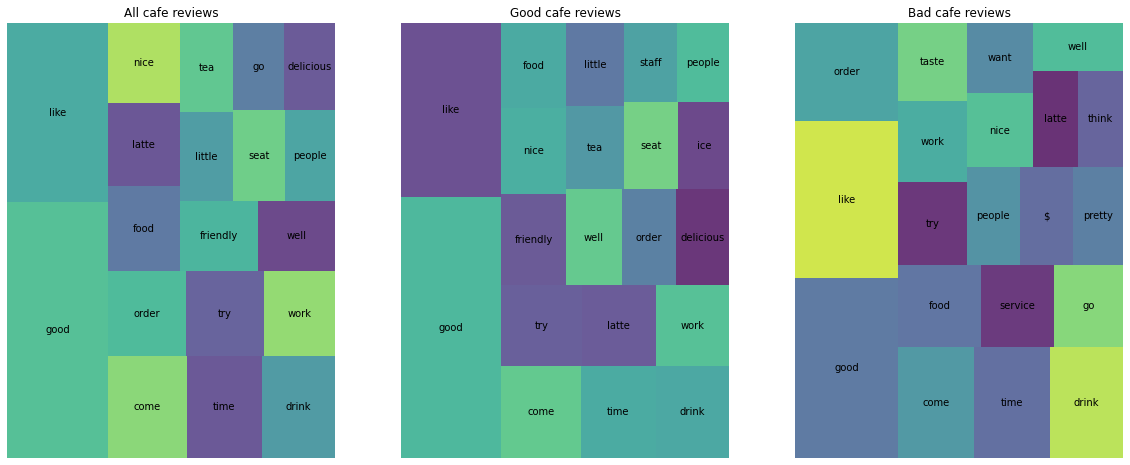

In [36]:
make_comp_plots(shops, 'spaCyLemmas_02', reduce=False)

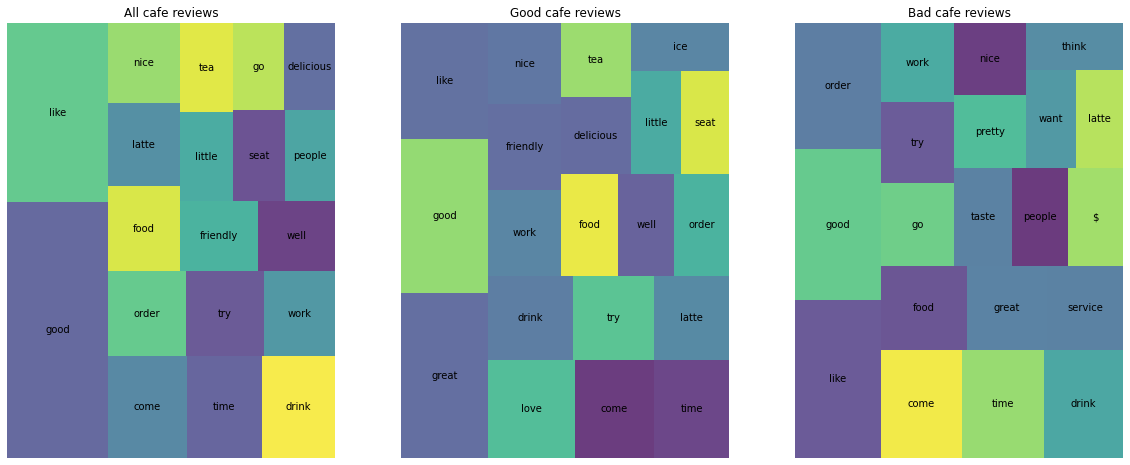

In [37]:
make_comp_plots(shops, 'spaCyLemmas_01', reduce=False)

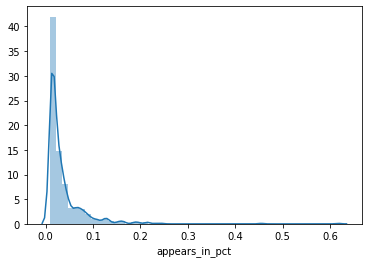

In [38]:
wc_reduced = wc[wc['appears_in_pct'] > 0.01]
sns.distplot(wc_reduced['appears_in_pct']);

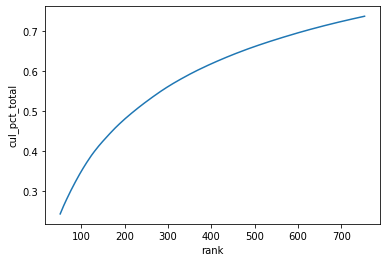

In [39]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc_reduced[50:]);

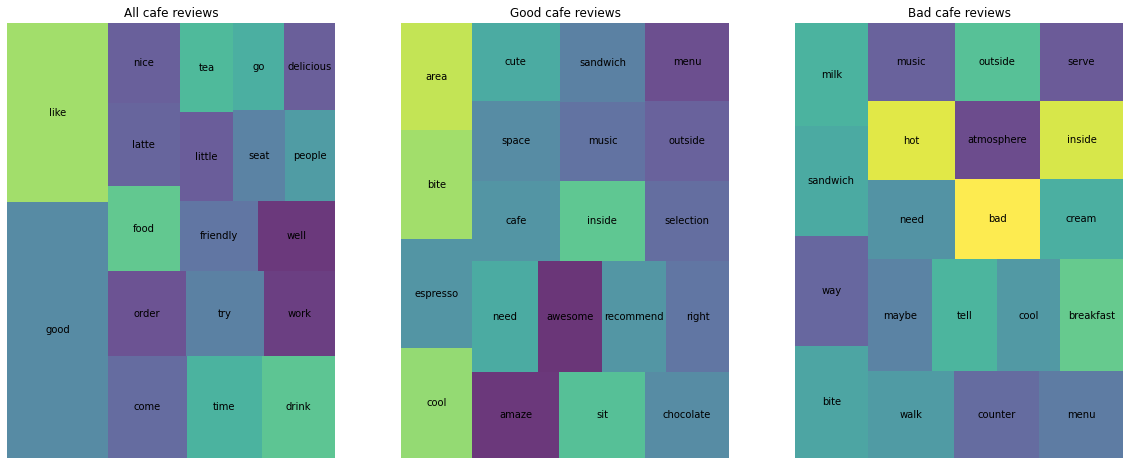

In [40]:
make_comp_plots(shops, 'spaCyLemmas_01', reduce=True, rank=55)

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [41]:
wc_good = count(shops[shops['good'] == True]['spaCyLemmas_01'])
wc_bad = count(shops[shops['bad'] == True]['spaCyLemmas_01'])

In [42]:
good_docs_len = len(shops[shops['good'] == True])
bad_docs_len = len(shops[shops['bad'] == True])

In [43]:
wc_good['rel_freq'] = [num/good_docs_len for num in wc_good['count']]
wc_bad['rel_freq'] = [num/bad_docs_len for num in wc_bad['count']]

In [44]:
wc_bad.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,rel_freq
22,like,594,947,1.0,0.013024,0.013024,0.402439,0.641599
9,good,604,912,2.0,0.012542,0.025566,0.409214,0.617886
107,order,425,756,3.0,0.010397,0.035963,0.287940,0.512195
68,come,439,622,4.0,0.008554,0.044517,0.297425,0.421409
205,time,427,620,5.0,0.008527,0.053043,0.289295,0.420054


In [45]:
wc_total = pd.merge(wc_good, wc_bad, how='inner', on='word')

In [46]:
wc_total['rel_freq_diff'] = abs(wc_total['rel_freq_x'] - wc_total['rel_freq_y'])
wc_top10 = wc_total.sort_values(by=['rel_freq_diff'], ascending=False).head(10)

/Users/anastasialysenko/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


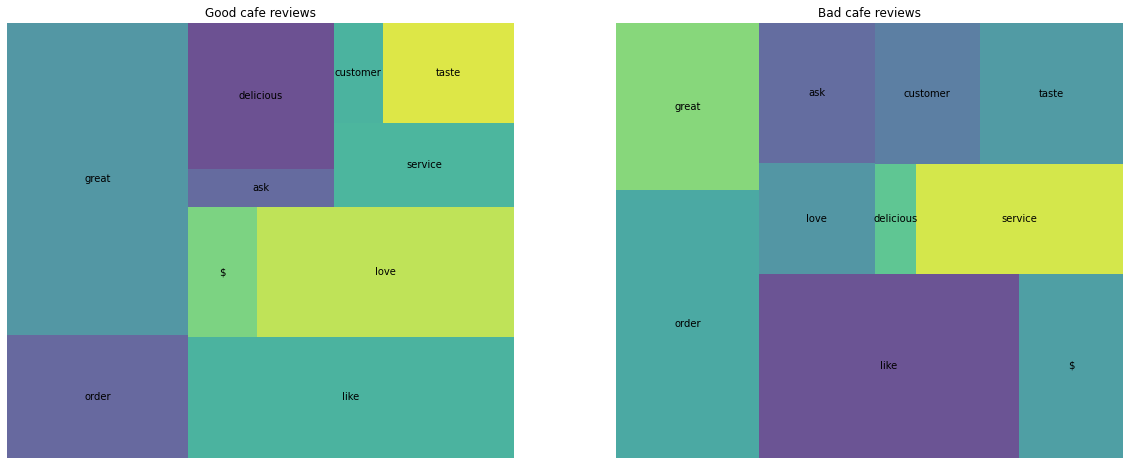

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

axes[0].set_title('Good cafe reviews')
squarify.plot(sizes=wc_top10['rel_freq_x'], label=wc_top10['word'], alpha=.8, ax=axes[0])
axes[0].axis('off')

axes[1].set_title('Bad cafe reviews')
squarify.plot(sizes=wc_top10['rel_freq_y'], label=wc_top10['word'], alpha=.8, ax=axes[1])
axes[1].axis('off')
fig.show()

In [53]:
# Create a copy and add column with product tags
subset_df = shops.copy()
subset_df.loc[subset_df['good'], 'category'] = 'Good'
subset_df.loc[subset_df['bad'], 'category'] = 'Bad'

# Drop Review that aren't Kindle/Fire HD 8
subset_df.dropna(subset=['category'], inplace=True)

# # Confirm shape and distribution of reviews
print(subset_df.shape)
subset_df['category'].value_counts()

(7616, 11)


Good    6140
Bad     1476
Name: category, dtype: int64

In [56]:
import scattertext as st

nlp = spacy.load("en_core_web_md")

corpus = st.CorpusFromPandas(subset_df, 
                             category_col='category', 
                             text_col='full_review_text',
                             nlp=nlp).build()

html = st.produce_scattertext_explorer(
    corpus,
    category='Good',
    category_name='Good',
    not_category_name='Bad',
    width_in_pixels=1000,
    metadata=subset_df['star_rating'])

open('./good_vs_bad.html', 'w').write(html)

6533151

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

